# Sales Analysis

_Import all required Libraries_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 


#### import all csv files and concatenate into one file

In [2]:
files = [file for file in os.listdir('D:\project\sales data anlaysis\sales analysis my project\Sales_Data')]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('D:\project\sales data anlaysis\sales analysis my project\Sales_Data\\'+file)
    all_data = pd.concat([all_data, df]).drop_duplicates().reset_index(drop=True)


In [3]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185683,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185684,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185685,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185686,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### lets check the NaN value in database.

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())
#romve all the rows if nan is there.
all_data = all_data.dropna()
all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185683,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185684,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185685,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185686,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
#reset the index
all_data.reset_index(inplace = True,drop = True)


In [6]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185682,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185683,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185684,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185685,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
# check if there is any nan value left.
all_data[all_data.isna().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


check the data types of all the column

In [8]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### as we see above quantity ordered ,price each should be in int and float datatype. Order date should be in timedate datatype.

It is seem that there are some string present in column'Quantity Ordered'

In [10]:
all_data.iloc[516]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 516, dtype: object

#### Get ride of text in 'Quantity Ordered'.

In [11]:
display(all_data[all_data['Quantity Ordered'].str[:16] == 'Quantity Ordered'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
516,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
#filter to eliminate string
all_data = all_data[all_data['Quantity Ordered'].str[:16]!='Quantity Ordered']

check the data type again.

In [13]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

as we see above order id ,quantity ordered ,price each should be in int datatype and order date should be in timedate datatype.

In [14]:
all_data=all_data.copy() # to avoid the "setting with copy warning" while changing data type.


In [15]:
#change the data type. 
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [16]:
#change order date to datetime data type
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


#### Add the month column

In [17]:
all_data['Month'] = pd.DatetimeIndex(all_data['Order Date']).month

#### Add the city column

In [18]:
def get_city(address):
    return address.split(",")[1].strip(" ")#return city and strip ' '(blank spaces)

def get_state(address):
    return address.split(",")[2].split(" ")[1]#return state and select the first string.

all_data['City'] = all_data['Purchase Address'].transform(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


#### Add the Sales column.

In [19]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [20]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
...,...,...,...,...,...,...,...,...,...
185682,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles (CA),8.97
185683,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco (CA),700.00
185684,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco (CA),700.00
185685,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco (CA),379.99


#### Add hour column

In [21]:
all_data['Hour'] = pd.DatetimeIndex(all_data['Order Date']).hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9


#### Add minute column

In [22]:
all_data['Minute'] = pd.DatetimeIndex(all_data['Order Date']).minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


### Question 1: What was the best month for sales? How much was earned that month? 

In [23]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales,Hour,Minute,Count
Month,,,,,,
1,10893,1810924.81,1821413.16,139339,282230,9699
2,13431,2186940.38,2200078.08,172392,354307,11957
3,16979,2789084.64,2804973.35,218622,446783,15128
4,20536,3366218.76,3389217.98,261916,543611,18257
5,18653,3133134.61,3150616.23,238580,487579,16552
6,15234,2560503.50,2576280.15,195223,401839,13535
7,16054,2631225.12,2646461.32,205909,416896,14275
8,13429,2226963.90,2241083.37,172049,353246,11943
9,13091,2081897.65,2094465.69,168206,341151,11603


In [24]:
x = [month for month, all_data in all_data.groupby(['Month'])]
y = all_data.groupby(['Month']).sum()['Sales']

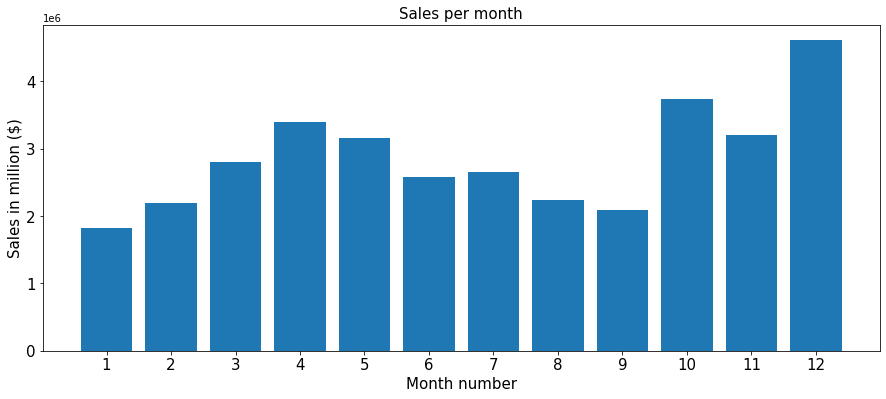

In [25]:
plt.figure(figsize=(15,6))
plt.bar(x,y)
plt.xticks(x,size =15)
plt.yticks(size=15)
plt.title('Sales per month',size=15)
plt.ylabel('Sales in million ($)',size=15)
plt.xlabel('Month number',size = 15)
plt.show();

#### Ans: December was the best month of sales of more then 4 million.

### Question 2: What city sold the most product?

In [26]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
City,,,,,,,
Atlanta (GA),16584,2778608.69,104649,2794199.07,214003,442412,14863
Austin (TX),11137,1808340.03,69720,1818044.33,141688,288674,9890
Boston (MA),22494,3634398.40,140898,3658627.65,287705,589414,19901
Dallas (TX),16707,2750026.38,104447,2765373.96,214078,434330,14797
Los Angeles (CA),33247,5417171.70,208020,5448304.28,426924,865442,29564
New York City (NY),27903,4632920.54,175557,4661867.14,357214,733011,24847
Portland (ME),2746,446752.36,17119,449321.38,35152,72743,2451
Portland (OR),11291,1859836.44,70517,1870010.56,144242,295104,9998
San Francisco (CA),50169,8204001.38,314949,8254743.55,642269,1317094,44662


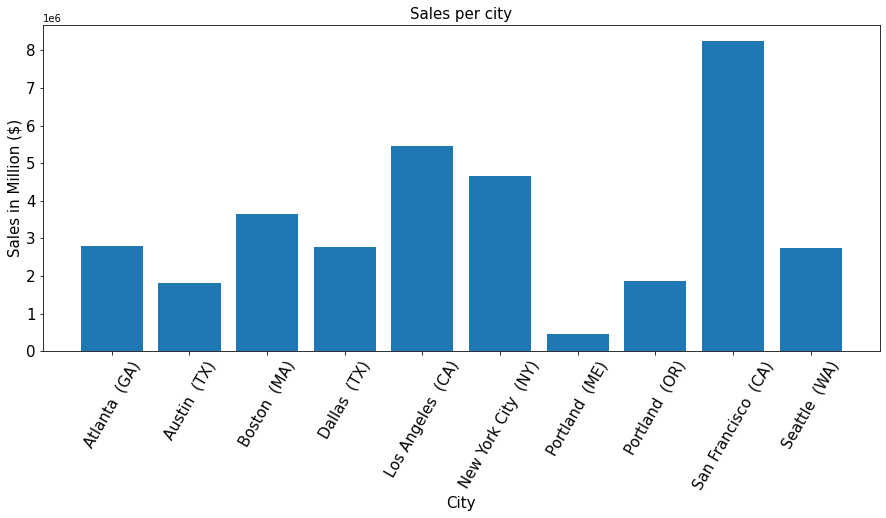

In [27]:
keys = [city for city, all_data in all_data.groupby(['City'])]
plt.figure(figsize=(15,6))
plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.title('Sales per city',fontsize = 15)
plt.ylabel('Sales in Million ($)',fontsize = 15)
plt.xlabel('City',fontsize = 15)
plt.xticks(keys, rotation=60, size=15)
plt.yticks(size=15)
plt.show();

#### Ans: San Francisco (CA) city sold the most product.

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [28]:
all_data.groupby(['Hour']).sum()

,Quantity Ordered,Price Each,Month,Sales,Minute,Count
Hour,,,,,,
0,4420,709124.09,27477,713548.66,103313,3902
1,2616,458187.02,16643,460563.90,61699,2347
2,1397,233821.65,8502,234839.45,32486,1242
3,927,144711.47,5903,145742.94,23043,830
4,935,161943.24,6135,162546.07,26830,852
5,1492,229606.26,9298,230664.87,42872,1320
6,2809,444850.12,17528,447963.01,80301,2481
7,4547,739781.31,28787,744067.32,127128,4002
8,6998,1185930.85,43605,1192309.20,198009,6252


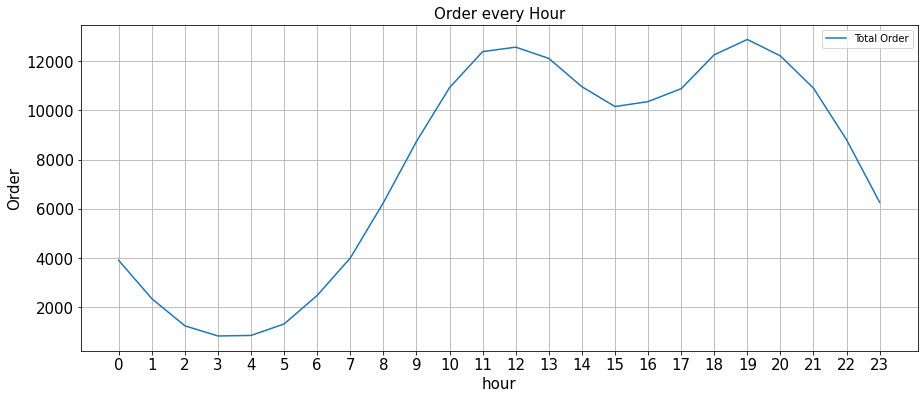

In [29]:
keys = [hour for hour, all_data in all_data.groupby(['Hour'])]
plt.figure(figsize=(15,6))
plt.plot(keys,all_data.groupby(['Hour']).sum()['Count'])
plt.title('Order every Hour',fontsize = 15)
plt.ylabel('Order',fontsize = 15)
plt.xlabel('hour',fontsize = 15)
plt.xticks(keys, size=15)
plt.yticks(size=15)
plt.legend(['Total Order'])
plt.grid()
plt.show();

#### Ans: My recommedation is around 11am (11) or 7pm (19)

### Question 4:  What product sold the most? Why do you think it sold the most?

In [30]:
product_group = all_data.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
Product,,,,,,,
20in Monitor,4126,450739.02,29319,453818.74,58729,122096,4098
27in 4K Gaming Monitor,6239,2427687.75,44396,2433147.61,90841,184129,6225
27in FHD Monitor,7541,1124625.02,52484,1131074.59,107422,219659,7498
34in Ultrawide Monitor,6192,2346058.26,43258,2352898.08,88957,183318,6174
AA Batteries (4-pack),27615,78942.72,145423,106041.60,298077,608560,20558
AAA Batteries (4-pack),30986,61629.88,146149,92648.14,296904,611350,20612
Apple Airpods Headphones,15637,2328750.00,109304,2345550.00,222938,454935,15525
Bose SoundSport Headphones,13430,1329667.02,93918,1342865.70,192077,391667,13298
Flatscreen TV,4813,1438200.00,34172,1443900.00,68719,142629,4794


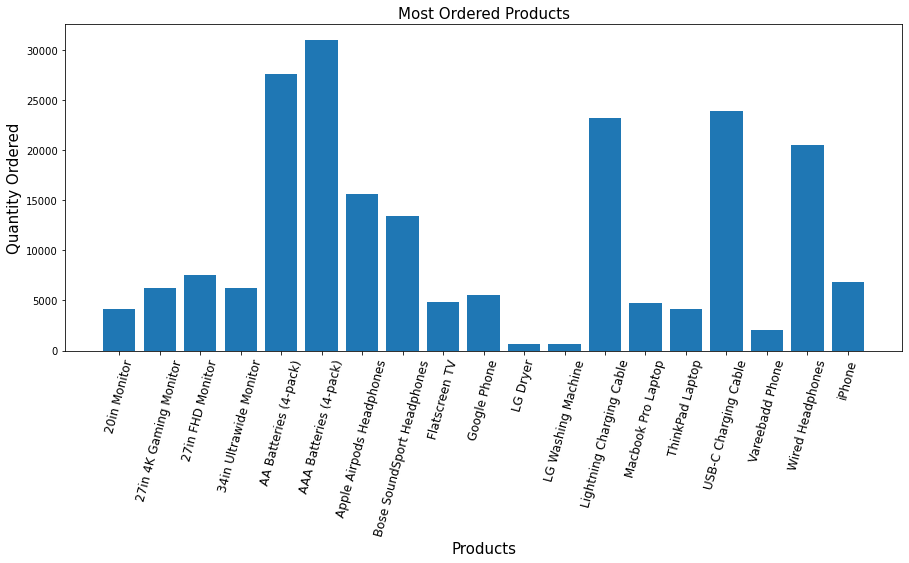

In [31]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, all_data in product_group]
plt.figure(figsize=(15,6))
plt.bar(keys, quantity_ordered)
plt.title('Most Ordered Products', size = 15)
plt.ylabel('Quantity Ordered',fontsize = 15)
plt.xlabel('Products',fontsize = 15)
plt.xticks(keys, rotation=75, size=12)
plt.show()

#### Ans: As we can see product like AAA Batteries (4-pack), AA Batteries (4-pack), Lightning Charging Cable, USB-C Charging Cable and Wired Headphones sold the most.

#### This can be due to it's price being lower. Let's check this theory.

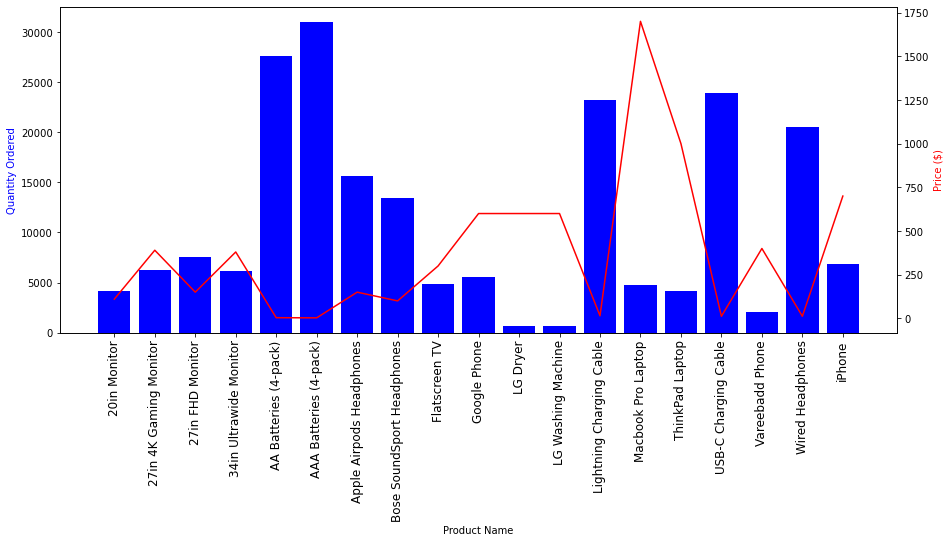

In [32]:
#plot the chart along the above graph.
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots(figsize=(15,6))

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='b')
ax2.plot(keys, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticks(keys)
ax1.set_xticklabels(keys, rotation='vertical', size=12)

plt.show()

#### Conclusion: As seen in above chart,this products are sold most is because of its lower price per unit as compaired to other products avaible.

### Question 5: What products are most often sold together?

In [33]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df = df.copy()
df['Group'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Group']].drop_duplicates()

In [34]:
df2

,Order ID,Group
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...
185601,259277,"iPhone,Wired Headphones"
185622,259297,"iPhone,Lightning Charging Cable"
185629,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185641,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [35]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Conclusion: following are the most product often sold together
- ('iPhone', 'Lightning Charging Cable') 1002
- ('Google Phone', 'USB-C Charging Cable') 985
